week9 objectives:

1. train on extracted features and set a baseline for multimodal sentiment detection
2. hyper-parameter tuning with grid search cross validation

In [1]:
# https://charlesreid1.github.io/circe/Digit%20Classification%20-%20PCA%20and%20SVC.html

In [1]:
%matplotlib inline

import numpy as np

# plots
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix


In [18]:
# load data
FEATURES_PATH = "../w9/feature"

FILE= "mel"

aco, label = np.load(f"{FEATURES_PATH}/{FILE}.npy"), np.load(F"{FEATURES_PATH}/label.npy").reshape(-1, 1)

print(f"acoustic: {aco.shape}", f"labels: {label.shape}")


acoustic: (14918, 64) labels: (14918, 1)


In [19]:
# split
x_train, x_test, y_train, y_test = train_test_split(aco, label.ravel(), random_state=101, test_size=0.3)

print(x_train.shape, y_train.shape)


(10442, 64) (10442,)


In [20]:
# dimensionality reduction
pca_ = PCA(n_components=30, whiten=True)

pca_.fit(x_train)
x_train_red = pca_.transform(x_train)

x_train_red.shape

(10442, 30)

In [21]:
steps = [
    # ('pca', PCA()),
    ('scaler', StandardScaler()),
    ('clf', SVC())
    ]
        
pipe = Pipeline(steps)


In [22]:
params = {
    # 'pca__n_components' : [60, 75, 90, 105],
    'clf__kernel' : ['linear', 'rbf'],
    'clf__gamma' : ['scale', 'auto']
}

gs = GridSearchCV(estimator=pipe, param_grid=params, scoring='accuracy', verbose=1)

gs.fit(x_train, y_train)

print(f"best params: {gs.best_params_}")


from sklearn.metrics import accuracy_score

y_pred = gs.predict(x_test)
acc = accuracy_score(y_test, y_pred)

print(f"test accuracy: {acc}")


Fitting 5 folds for each of 4 candidates, totalling 20 fits
best params: {'clf__gamma': 'scale', 'clf__kernel': 'rbf'}
test accuracy: 0.5978552278820375


In [23]:
# without tuning
svc = pipe.fit(x_train, y_train)

train_acc = float(svc.score(x_train, y_train))

print("---- train accuracy %s ----" % round(train_acc, 4))

predictions = svc.predict(x_test)

print("---- test accuracy %s ----" % round(accuracy_score(y_test, predictions), 4))


---- train accuracy 0.6556 ----
---- test accuracy 0.5979 ----


In [24]:
labels = {0: "negative", 1: "neutral", 2: "positive"}


list(labels.values())

['negative', 'neutral', 'positive']

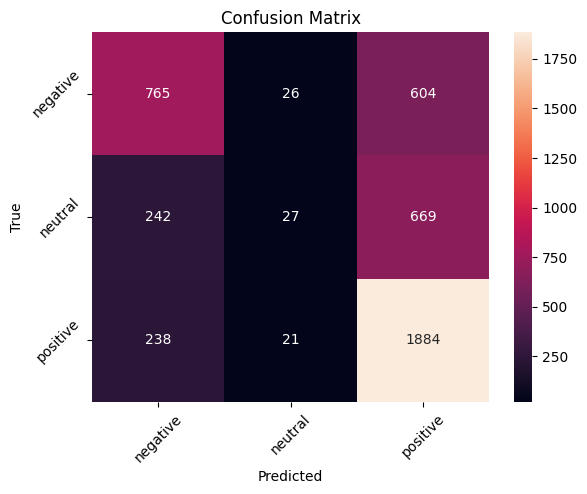

In [25]:
ax= plt.subplot()

predictions = gs.predict(x_test)
cm = confusion_matrix(y_test, predictions)

sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel("Predicted"); ax.set_ylabel("True"); 

ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(list(labels.values()), rotation=45); ax.yaxis.set_ticklabels(list(labels.values()), rotation=45);

In [26]:
print("---- test accuracy %s ----" % round(accuracy_score(y_test, predictions), 4))

---- test accuracy 0.5979 ----


In [41]:
# print(classification_report(y_test, predictions, target_names=list(labels.values())))

In [27]:
import pickle

with open("svc.p", 'wb') as f:
    pickle.dump(gs, f)


main: train a baseline and optimize hyperparameters with grid search cross validation, saved the model as pickle- svc.p